1. Discussão:

Formalização do Problema: Desde a década de 70, quando a produção de biocombustíveis começou a ser incentivada no Brasil, a demanda por etanol vem crescendo como uma alternativa mais acessível ao consumidor. Assim, o objetivo deste projeto foi utilizar um modelo de Regressão Linear para previsão do preço médio do etanol hidratado.

Análise Exploratória: Como análise exploratória foi feito um resumo estatistico, a criação de histogramas para o valor das variáveis serem vistos ao longo do tempo e foi calculada a matriz de correlação para entender a dependência linear entre as variáveis.

A principal transformação dos dados executada foi o corte da base de dados anteriores a data de 01/01/2017 devido a mudanças de legislação na precificação dos combustíveis e a adaptação da base de dados para que todas as amostragens de preço fossem consideradas semanalmente, já que algumas observações eram diárias e outras semanais, para essa adaptação foi realizado o cálculo de média simples dos valores diários para definir o valor semanal de uma variável.

Para aplicação do modelo de Regressão Linear os valores foram normalizados entre os valores de 0-1.

Algoritmos:

    Regressão linear: é um método estatístico que busca estabelecer uma relação linear entre a variável dependente (a variável que você deseja prever) e uma ou mais variáveis independentes (as variáveis que você usa para prever a variável dependente).

Escolha dos algoritmos:

    Regressão Linear: Pela sua simplicidade e fácil entendimento a Regressão Linear passa a ser uma boa escolha, além disto ela é adequada para prever variáveis continuas (como preço de comodities que estamos lidando) e também pode ser uma boa indicadora de tendências.

    

2. Trabalhos Correlatos:


Regressão Linear: No trabalho de Carassai, Aline Ferrarini, et al. "ANÁLISE MULTIVARIADA APLICADA AO PREÇO DO ETANOL HIDRATADO PRATICADO NO BRASIL." foi utilizado um algoritmo de Regressão Linear Multipla para fazer a previsão de preço do Etanol Hidratado. Neste trabalho os autores fizeram uma análise de diversas variáveis preditoras para identificar quais possuiam uma maior correlação com o preço do Etanol Hidratado. Escolherem as variáveis com maior correlação e ao aplicar o método obtiveram resultados próximos ao que seria o resultado real.

3. Metodologia

Como métrica de avaliação foram utilizados medidas estatisticas básicas como: média, mediana, DP, variância, etc. Foi também calculado o erro médio quadrático e os resultados esperados X obtidos foram plotados em um gráfico para que tenhamos uma melhor visualização dos resultados.

Foram aplicados dois testes:
No primeiro teste treinamos o conjunto com a base de treino e testamos a predição com a base de testes.
No segundo teste treinamos o conjunto com a base de treino e testamos a predição também com a base de treino.

4. Aplicação dos Algoritmos:

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

directory = 'dados2/'
df1 = pd.read_csv(directory + 'acucar_diario_ny_usd.csv')
df2 = pd.read_csv(directory + 'acucar_diario_rp_blr.csv')
df3 = pd.read_csv(directory + 'brent_diario_usd.csv')
df4 = pd.read_csv(directory + 'dolar_diario_blr.csv')
df5 = pd.read_csv(directory + 'etanol_semanal_anp_blr.csv')
df6 = pd.read_csv(directory + 'gasolina_semanal_anp_blr.csv')
df7 = pd.read_csv(directory + 'rbob_diario_usd.csv')

df1 = df1[['data_inicio', 'acucar_usd']]
df2 = df2[['data_inicio', 'acucar_blr']]
df3 = df3[['data_inicio', 'brent_usd']]
df4 = df4[['data_inicio', 'dolar_blr']]
df5 = df5[['data_inicio', 'etanol_blr']]
df6 = df6[['data_inicio', 'gasolina_blr']]
df7 = df7[['data_inicio', 'rbob_usd']]

df = pd.merge(df1, df2, on='data_inicio')
df = pd.merge(df, df3, on='data_inicio')
df = pd.merge(df, df4, on='data_inicio')
df = pd.merge(df, df6, on='data_inicio')
df = pd.merge(df, df7, on='data_inicio')

df = df.drop('data_inicio', axis=1)
df5 = df5.drop('data_inicio', axis=1)


scalerX1 = MinMaxScaler()
dfX_normalized = pd.DataFrame(scalerX1.fit_transform(df), columns=df.columns)

scalerY1 = MinMaxScaler()
dfY_normalized = pd.DataFrame(scalerY1.fit_transform(df5['etanol_blr'].values.reshape(-1, 1)))

model = LinearRegression()
model.fit(dfX_normalized, dfY_normalized)


directory_teste = 'dados_teste2/'
dfTeste1 = pd.read_csv(directory_teste + 'acucar_diario_ny_usd.csv')
dfTeste2 = pd.read_csv(directory_teste + 'acucar_diario_rp_blr.csv')
dfTeste3 = pd.read_csv(directory_teste + 'brent_diario_usd.csv')
dfTeste4 = pd.read_csv(directory_teste + 'dolar_diario_blr.csv')
dfTeste5 = pd.read_csv(directory_teste + 'etanol_semanal_anp_blr.csv')
dfTeste6 = pd.read_csv(directory_teste + 'gasolina_semanal_anp_blr.csv')
dfTeste7 = pd.read_csv(directory_teste + 'rbob_diario_usd.csv')

dfTeste1 = dfTeste1[['data_inicio', 'acucar_usd']]
dfTeste2 = dfTeste2[['data_inicio', 'acucar_blr']]
dfTeste3 = dfTeste3[['data_inicio', 'brent_usd']]
dfTeste4 = dfTeste4[['data_inicio', 'dolar_blr']]
dfTeste5 = dfTeste5[['data_inicio', 'etanol_blr']]
dfTeste6 = dfTeste6[['data_inicio', 'gasolina_blr']]
dfTeste7 = dfTeste7[['data_inicio', 'rbob_usd']]

dfTeste = pd.merge(dfTeste1, dfTeste2, on='data_inicio')
dfTeste = pd.merge(dfTeste, dfTeste3, on='data_inicio')
dfTeste = pd.merge(dfTeste, dfTeste4, on='data_inicio')
dfTeste = pd.merge(dfTeste, dfTeste6, on='data_inicio')
dfTeste = pd.merge(dfTeste, dfTeste7, on='data_inicio')

dfTeste = dfTeste.drop('data_inicio', axis=1)

scalerX2 = MinMaxScaler()
dfXTeste_normalized = pd.DataFrame(scalerX2.fit_transform(dfTeste), columns=dfTeste.columns)

scalerY2 = MinMaxScaler()
dfYTeste_normalized = pd.DataFrame(scalerY2.fit_transform(dfTeste5['etanol_blr'].values.reshape(-1, 1)))

In [26]:
def mostra_estatisticas(saidaEsperada, saidaObtida):
    mse = mean_squared_error(saidaEsperada, saidaObtida)

    difs = []
    for i in range(len(saidaObtida)):
        difs.append(saidaEsperada[i] - saidaObtida[i])

    media = np.mean(difs)
    mediana = np.median(difs)
    minimo = np.min(difs)
    maximo = np.max(difs)
    desvio_padrao = np.std(difs)
    variancia = np.mean([(x - media) ** 2 for x in difs])
    coeficiente_variacao = (desvio_padrao / media) * 100

    print("Mínimo:", minimo)
    print("Máximo:", maximo)
    print("Média:", media)
    print("Mediana:", mediana)
    print("Desvio Padrão:", desvio_padrao)
    print("Variância:", variancia)
    print("Coeficiente de Variação:", coeficiente_variacao)
    print("Erro médio quadrático (MSE):", mse)


def plot_grafico(saidaEsperada, saidaObtida):
    indices = range(len(saidaEsperada))

    arrReal = np.array(saidaEsperada)
    arrPredicao = np.array(saidaObtida)

    plt.plot(indices, arrReal, 'b-', label='Valores Reais')

    plt.plot(indices, arrPredicao, 'r-', label='Predições')

    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()

    plt.show()


def identifica_tendencias(saidaEsperada, saidaObtida):
    acertos = 0
    erros = 0

    for i in range(len(saidaEsperada) - 1):
        difEsperado = saidaEsperada[i] - saidaEsperada[i + 1]
        difObtido = saidaObtida[i] - saidaObtida[i + 1]

        if difEsperado < 0:
            if difObtido < 0:
                acertos += 1
            else:
                erros += 1
        elif difEsperado > 0:
            if difObtido > 0:
                acertos += 1
            else:
                erros += 1
        else:
            if difObtido == 0:
                acertos += 1
            else:
                erros += 1

    print("Acertos:", acertos)
    print("Erros:", erros)
    print("Porcentagem correta:", acertos*100/(len(saidaEsperada)-1))
    print("Porcentagem erros:", erros*100/(len(saidaEsperada)-1))

4.1 Resultado do modelo de Regressão Linear na base de teste:

Coeficientes: [[ 0.11039376  0.17212458 -0.25720083 -0.12307892  0.99342435 -0.04998895]]
Intercept: [0.04784299]
R²: -0.18180110814356132
Mínimo: 0.01699921343168187
Máximo: 0.40632574553982836
Média: 0.2059969835275922
Mediana: 0.20206632923803758
Desvio Padrão: 0.11972903702379978
Variância: 0.01433504230664642
Coeficiente de Variação: 58.121742839871594
Erro médio quadrático (MSE): 0.056769799529113506


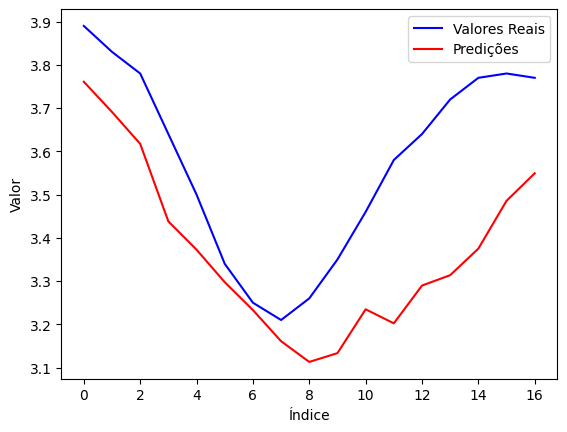

Acertos: 13
Erros: 3
Porcentagem correta: 81.25
Porcentagem erros: 18.75


In [27]:
X = dfXTeste_normalized
Y = dfYTeste_normalized

yPred = model.predict(X)
print('Coeficientes:', model.coef_)
print('Intercept:', model.intercept_)
print('R²:', model.score(X, Y))

yPred = scalerY2.inverse_transform(yPred)

saidaEsperada = dfTeste5['etanol_blr']
saidaObtida = yPred

mostra_estatisticas(saidaEsperada, saidaObtida)
plot_grafico(saidaEsperada, saidaObtida)
identifica_tendencias(saidaEsperada, saidaObtida)

4.2 Resultado do modelo de Regressão Linear na base de treinamento:

Coeficientes: [[ 0.11039376  0.17212458 -0.25720083 -0.12307892  0.99342435 -0.04998895]]
Intercept: [0.04784299]
R²: 0.9740921774563854
Mínimo: -0.4180562541647772
Máximo: 0.3297257107906413
Média: -9.729162901308792e-17
Mediana: -0.014905404390384458
Desvio Padrão: 0.13515578654492302
Variância: 0.018267086636576797
Coeficiente de Variação: -1.3891820695770395e+17
Erro médio quadrático (MSE): 0.018267086636576797


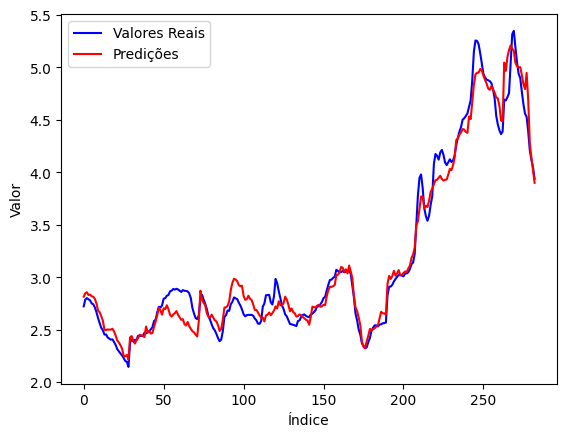

Acertos: 206
Erros: 76
Porcentagem correta: 73.04964539007092
Porcentagem erros: 26.95035460992908


In [28]:
X = dfX_normalized
Y = dfY_normalized

yPred = model.predict(X)
print('Coeficientes:', model.coef_)
print('Intercept:', model.intercept_)
print('R²:', model.score(X, Y))

yPred = scalerY1.inverse_transform(yPred)

saidaEsperada = df5['etanol_blr']
saidaObtida = yPred

mostra_estatisticas(saidaEsperada, saidaObtida)
plot_grafico(saidaEsperada, saidaObtida)
identifica_tendencias(saidaEsperada, saidaObtida)

5. Resultados:


5.1 Para a regressão linear foram utilizados os valores padrões da biblioteca.

5.2 Para os dados de treinamento obtivemos os seguintes resultados:

Mínimo: -0.4180562541647772

Máximo: 0.3297257107906413

Média: -9.729162901308792e-17

Mediana: -0.014905404390384458

Desvio Padrão: 0.13515578654492302

Variância: 0.018267086636576797

Coeficiente de Variação: -1.3891820695770395e+17

Erro médio quadrático (MSE): 0.018267086636576797

5.3 Já para os dados de teste obtivemos os seguintes resultados:

Mínimo: 0.01699921343168187

Máximo: 0.40632574553982836

Média: 0.2059969835275922

Mediana: 0.20206632923803758

Desvio Padrão: 0.11972903702379978

Variância: 0.01433504230664642

Coeficiente de Variação: 58.121742839871594

Erro médio quadrático (MSE): 0.056769799529113506

5.4 Com os dados de teste temos um MSE menor, porém os testes em ambos os casos obtemos um DP grande em torno dos 12 centavos e máximas de 40 centavos o que é um valor muito alto a se considerar como possível fator de decisão comercial.

Mesmo quando analisando somente a tendência como possível fator decisório temos uma porcentagem de erro alta de aproximadamente 25% na base de treinamento e 19% na base de testes, vale ressaltar que esse valor está menor na base de testes devido a quantidade de amostras, já que a base de treinamento contem 282 amostras e a base de teste somente 16. Dito isto a análise da tendência como fator decisório não parece promissora.

5.5 Resultados do trabalho que utilizou a mesma base de dados

Preço Real | Preço Previsto

3,34       | 3,41

3,25       | 3,34

3,21       | 3,34

3,26       | 3,25

3,35       | 3,28

3,46       | 3,20

3,58       | 3,21

3,64       | 3,25

3,72       | 3,49

3,77       | 3,56

3,78       | 3,35

3,89       | 4,06

3,83       | 3,82

3,78       | 3,62

3,64       | 3,60

3,5        | 3,60

Mínimo: -0.16999999999999948
Máximo: 0.4299999999999997
Média: 0.10125
Mediana: 0.05500000000000016
Desvio Padrão: 0.18966664835969443
Variância: 0.035973437499999976
Coeficiente de Variação: 187.3250847996982
Erro médio quadrático (MSE): 0.046224999999999974


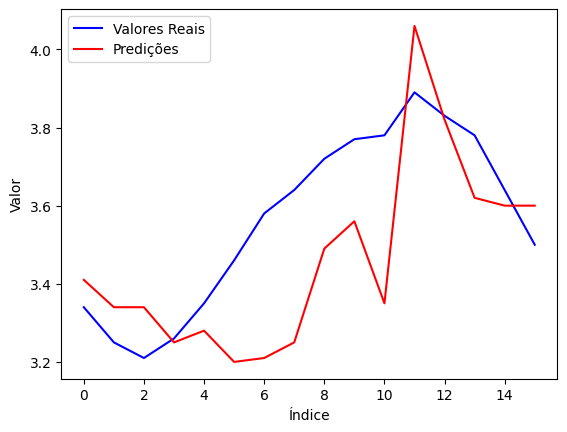

Acertos: 10
Erros: 5
Porcentagem correta: 66.66666666666667
Porcentagem erros: 33.333333333333336


In [30]:

saidaEsperada = [3.34,3.25,3.21,3.26,3.35,3.46,3.58,3.64,3.72,3.77,3.78,3.89,3.83,3.78,3.64,3.5]
saidaObtida = [3.41,3.34,3.34,3.25,3.28,3.20,3.21,3.25,3.49,3.56,3.35,4.06,3.82,3.62,3.60,3.60]

mostra_estatisticas(saidaEsperada, saidaObtida)
plot_grafico(saidaEsperada, saidaObtida)
identifica_tendencias(saidaEsperada, saidaObtida)

O trabalho relacionado possui resultados mais promissores já que utiliza uma Múltipla Regressão Linear.

A média dos erros e o desvio padrão obtiveram resultados que se aproximam da metade encontrada pela Regressão Linear, isto além do fato do MSE encontrado também ser ligeramente menor o que é outro ponto positivo.

Todavia este modelo teve um desempenho pior quando se tratava de prever as tendências já que seu erro foi de um terço do total dos resultados, e o valor máximo encontrado de 0.40R$ é expressivamente alto ao se tratar de um erro de predição.

6. Discussões

Quando os resultados são comparados com o autor original da base de dados é possível de concluir que, os resultados no geral quando se utiliza a Regressão Linear Multipla são mais acertivos quando comparados com os resultados da Regressão Linear, mesmo que a taxa de erro da tendência seja pior creio que com uma quantidade razoável maior de amostras esse erro iria ficar menor.

7. Conclusões e Trabalhos Futuros

Assim como o autor da base de dados, também concluimos que apesar do modelo apresentar erros que aparentam ser pequenos o seu uso é inviável, visto que o modelo pode errar por uma grande diferença também o que acarretaria em prejuizos igualmente grandes.

Como trabalho futuro é possível de tentar utilizar outras formas de normalização para observar se os resultados obtidos se tornam mais satisfatórios, pode também aumentar o tamanho da base a ser considerada, ou tentar utilizar outra maneira de aglutinação dos valores que possuem observações diárias visto que a média é uma medida muito simples.

Também é possível de tentar se construir um modelo para tentar ser mais acertivo na tendência do valor ao invés de tentar acertar o valor real.